### Load libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import random

import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load data

In [ ]:

# Setting base directory path
base_dir = '/content/drive/My Drive/TRAFFIC SIGN CLASSIFICATION/Traffic-Sign-Classification-main/MAIN/data/multi-class/New folder/'

# Setting directory path for images
stop_dir = base_dir + 'STOP'
aheadonly_dir = base_dir + 'aheadonly'
p_crossing_dir = base_dir + 'p_crossing'
bike_dir = base_dir + 'bike'
gostraightorleft_dir = base_dir+'gostraightorleft'
noentry_dir = base_dir + 'noentry'
roundabout_dir = base_dir + 'roundabout'
speedlimit20_dir = base_dir + 'speedlimit:20'
speedlimit100_dir = base_dir + 'speedlimit100'
Trucks_dir = base_dir + 'Trucks'



print('Total stop sign images:', len(os.listdir(stop_dir)))
print('Total aheadonly sign images:', len(os.listdir(aheadonly_dir)))
print('Total p_crossing sign images:', len(os.listdir(p_crossing_dir)))
print('Total bike sign images:', len(os.listdir(bike_dir)))
print('Total gostraightorleft sign images:', len(os.listdir(gostraightorleft_dir)))
print('Total noentry:',len(os.listdir(noentry_dir)))
print('Total roundabout:',len(os.listdir(roundabout_dir)))
print('Total speedlimit20:',len(os.listdir(speedlimit20_dir)))
print('Totalspeedlimit100:',len(os.listdir(speedlimit100_dir)))
print('Total Trucks:',len(os.listdir(Trucks_dir)))


Total stop sign images: 168
Total aheadonly sign images: 270
Total p_crossing sign images: 240
Total bike sign images: 160
Total gostraightorleft sign images: 237
Total noentry: 240
Total roundabout: 280
Total speedlimit20: 148
Totalspeedlimit100: 260
Total Trucks: 300


In [ ]:
# Get path of each image in the sub folders
stop_images = [stop_dir + '/{}'.format(i) for i in os.listdir(stop_dir)]
aheadonly_images = [aheadonly_dir + '/{}'.format(i) for i in os.listdir(aheadonly_dir)]
p_crossing_images = [p_crossing_dir + '/{}'.format(i) for i in os.listdir(p_crossing_dir)]
bike_images = [bike_dir + '/{}'.format(i) for i in os.listdir(bike_dir)]
gostraightorleft_images = [gostraightorleft_dir + '/{}'.format(i) for i in os.listdir(gostraightorleft_dir)]
noentry_images = [noentry_dir + '/{}'.format(i) for i in os.listdir(noentry_dir)]
roundabout_images = [roundabout_dir + '/{}'.format(i) for i in os.listdir(roundabout_dir)]
speedlimit20_images = [speedlimit20_dir + '/{}'.format(i) for i in os.listdir(speedlimit20_dir)]
speedlimit100_images = [speedlimit100_dir + '/{}'.format(i) for i in os.listdir(speedlimit100_dir)]
trucks_images = [Trucks_dir + '/{}'.format(i) for i in os.listdir(Trucks_dir)]

In [ ]:
# Desired dimension for each image in the dataset
width = 32
height = 32

# 3 for color images and 1 for grayscale
channels = 3

# Function to get x input(array representing picture) and the corresponding label
def read_process_images(image_list, label):
    X = []
    Y = []
    
    for image in image_list:
        #print('abspath:     ', os.path.abspath(image))
        #print('abs dirname: ', os.path.dirname(os.path.abspath(image)))
        image_arr = cv2.imread(image, cv2.IMREAD_UNCHANGED)
        image_arr = cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB )
        X.append(cv2.resize(image_arr ,  (width, height), interpolation=cv2.INTER_AREA))
        Y.append(label)
    return X, Y
  

In [ ]:
# Since the model can only work with numeric data, we will use 0,1,2,3........ for differnt classes
# preprocess  images 
stop_x, stop_y = read_process_images(stop_images, 0)
print('stop')

# preprocess warning sign images
aheadonly_x, aheadonly_y = read_process_images(aheadonly_images, 1)
print('aheadonly')

# preprocess regulatory sign images
p_crossing_x, p_crossing_y = read_process_images(p_crossing_images, 2)
print('p_crossing')

# preprocess regulatory sign images
bike_x, bike_y = read_process_images(bike_images, 3)
print('bike')

# preprocess regulatory sign images
gostraightorleft_x, gostraightorleft_y = read_process_images(gostraightorleft_images, 4)
print('gostraightorleft')

# preprocess noentry sign images 
noentry_x, noentry_y = read_process_images(noentry_images, 5)
print('noentry')

# preprocess roundabout sign images 
roundabout_x, roundabout_y = read_process_images(roundabout_images, 6)
print('roundabout_images')

# preprocess speedlimit20 images 
speedlimit20_x, speedlimit20_y = read_process_images(speedlimit20_images, 7)
print('speedlimit20_images')

# preprocess sppedlimit100 images 
speedlimit100_x, speedlimit100_y = read_process_images(speedlimit100_images, 8)
print('speedlimit100_images')

# preprocess truck images 
trucks_x, trucks_y = read_process_images(trucks_images, 9)
print('trucks_images')



X = stop_x +  aheadonly_x + p_crossing_x +bike_x + gostraightorleft_x + noentry_x + speedlimit20_x + roundabout_x +speedlimit100_x + trucks_x 
Y = stop_y +  aheadonly_y + p_crossing_y +bike_y + gostraightorleft_y + noentry_y + speedlimit20_y + roundabout_y +speedlimit100_y + trucks_y

print('Length of X: ', len(X))
print('Length of Y: ', len(Y))

stop
aheadonly
p_crossing
bike
gostraightorleft
noentry
roundabout_images
speedlimit20_images
speedlimit100_images
trucks_images
Length of X:  2303
Length of Y:  2303


In [ ]:
# Convert list to array
X = np.array(X)
Y = np.array(Y)
print(Y)

[0 0 0 ... 9 9 9]


In [ ]:
# Dimensions of input - 2303 rows with 32*32 pixels and 3 for rgb
X.shape

(2303, 32, 32, 3)

In [ ]:
# Dimension of label - 2303 rows
Y.shape

(2303,)

In [ ]:
from keras.utils import to_categorical

# Shuffle both inputs and labels for splitting in the future.
shuffler = np.random.permutation(len(X))
X = X[shuffler]
Y = Y[shuffler]

Y = to_categorical(Y)

### Create train-validation split on data

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print('Shape of train images: ', x_train.shape)
print('Shape of train labels: ', y_train.shape)

print()

print('Shape of validation images: ', x_test.shape)
print('Shape of validation labels: ', y_test.shape)

Shape of train images:  (1842, 32, 32, 3)
Shape of train labels:  (1842, 10)

Shape of validation images:  (461, 32, 32, 3)
Shape of validation labels:  (461, 10)


In [ ]:
y_train[0].shape

(10,)

In [ ]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# Length of train and validation data
ntrain = len(x_train)
ntest = len(x_test)
ntest

461

We have 2303 training images and 461 validation images. Since the dataset is small, we will use image augmentation before training the model.

### Data Preprocessing with image augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255, # Normalization.
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True,)

# Validation dataset doesn't need image augmentation. Only normalization
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Defining batch size. It has to be the power of 2
# The batch size tells the data generator to only take the specified batch(16 in our case) of images at a time.
batch_size = 16

# Create image generators using the train and test data
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size)

### Model building - CNN classifier

In [ ]:
model = Sequential()

# First convolution as the input layer with relu activation. 
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))

# Second convolution with relu activation and 256 output filters
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolution with relu activation and 512 output filters
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output layer to 1 dimension
model.add(Flatten())

# Add a dropout rate of 0.5 Dropout randomly drops some layers in a neural networks and then learns with the reduced network.
model.add(Dropout(0.5))

# Add a fully connected layer with 100 hidden units and ReLU activation
model.add(Dense(100, activation='relu'))

# Add a final softmax classification with 3 hidden units for 3 classes
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 512)         1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# initiate adam optimizer with learning rate 0.0001
opt = keras.optimizers.Adam(lr=0.0001)

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# Training model
history = model.fit_generator(train_generator,
                            
                            steps_per_epoch= ntrain// batch_size,
                             epochs=40,
                             validation_data=test_generator,
                              validation_steps= ntest// batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
115/115 [==============================] - 9s 17ms/step - loss: 2.2227 - accuracy: 0.1718 - val_loss: 1.7397 - val_accuracy: 0.2522
Epoch 2/40
115/115 [==============================] - 2s 13ms/step - loss: 1.6717 - accuracy: 0.3408 - val_loss: 1.3488 - val_accuracy: 0.4152
Epoch 3/40
115/115 [==============================] - 2s 13ms/step - loss: 1.4611 - accuracy: 0.3900 - val_loss: 1.1976 - val_accuracy: 0.4554
Epoch 4/40
115/115 [==============================] - 2s 13ms/step - loss: 1.3393 - accuracy: 0.4489 - val_loss: 1.1046 - val_accuracy: 0.6071
Epoch 5/40
115/115 [==============================] - 2s 14ms/step - loss: 1.2499 - accuracy: 0.4731 - val_loss: 0.9537 - val_accuracy: 0.6295
Epoch 6/40
115/115 [==============================] - 2s 14ms/step - loss: 1.1451 - accuracy: 0.5426 - val_loss: 0.8405 - val_accuracy: 0.7321
Epoch 7/40
115/115 [==============================] - 2s 14ms/step - loss: 0.9986 - accuracy: 0.6148 - val_loss: 0.7131 - val_accuracy: 0.7188

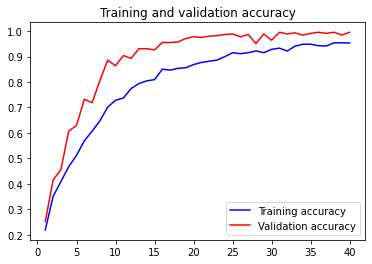

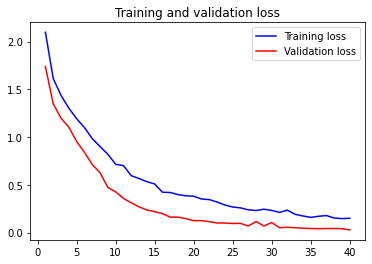

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
evaluation = model.evaluate(x_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

15/15 [==============================] - 0s 8ms/step - loss: 171.3649 - accuracy: 0.6529
Test Accuracy : 0.653


In [ ]:
# get the predictions for the test data
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# 'STOP'
# aheadonly_dir = base_dir + 'aheadonly'
# p_crossing_dir = base_dir + 'p_crossing'
# bike_dir = base_dir + 'bike'
# gostraightorleft_dir = base_dir+'gostraightorleft'


Predicted:  speedlimit20


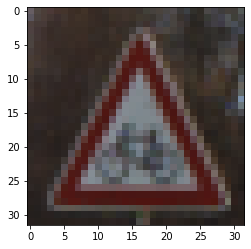

In [ ]:
mapping = ['Stop sign', 'Aheadonly sign', 'p_crossing sign','bike crossing sign', 'gostarightorleft sign','noentry', 'roundabout', 'speedlimit20','speedlimit100', 'truck']
# stop
# aheadonly
# p_crossing
# bike
# gostraightorleft
# noentry
# roundabout_images
# speedlimit20_images
# speedlimit100_images
# trucks_images

plt.imshow(x_test[4])
print()
print('Predicted: ', mapping[y_pred[4]])

Predicted:  speedlimit20


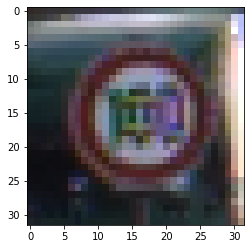

In [ ]:
print('Predicted: ', mapping[y_pred[55]])
plt.imshow(x_test[55])

Predicted:  speedlimit20


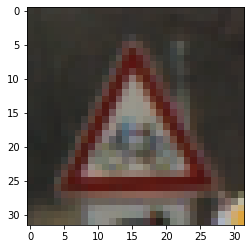

In [ ]:
print('Predicted: ', mapping[y_pred[8]])
plt.imshow(x_test[8])

Predicted:  speedlimit20


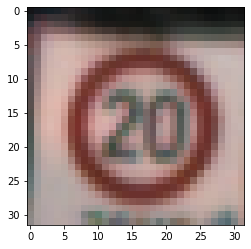

In [ ]:
print('Predicted: ', mapping[y_pred[45]])
plt.imshow(x_test[45])

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(rounded_labels, y_pred) 
print(classification_report(rounded_labels, y_pred, target_names = mapping))

                       precision    recall  f1-score   support

            Stop sign       0.94      1.00      0.97        32
       Aheadonly sign       0.56      1.00      0.72        59
      p_crossing sign       0.77      0.68      0.72        44
   bike crossing sign       0.88      0.41      0.56        34
gostarightorleft sign       1.00      0.34      0.51        47
              noentry       1.00      0.96      0.98        53
           roundabout       0.97      0.70      0.82        54
         speedlimit20       0.26      1.00      0.42        23
        speedlimit100       1.00      0.23      0.37        53
                truck       0.98      0.98      0.98        62

             accuracy                           0.73       461
            macro avg       0.84      0.73      0.70       461
         weighted avg       0.87      0.73      0.73       461



In [ ]:
image1 = cv2.imread('/content/drive/My Drive/TRAFFIC SIGN CLASSIFICATION/Traffic-Sign-Classification-main/MAIN/data/multi-class/new/new1.jpg')  

IndexError: ignored

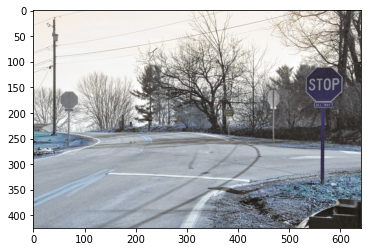

In [ ]:
plt.imshow(image1)
print(mapping[predicted_classes[image1]])

new images


In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os
# import glob
# data_path = '/content/drive/My Drive/TRAFFIC SIGN CLASSIFICATION/Traffic-Sign-Classification-main/MAIN/data/multi-class/new'
# os.listdir(data_path)



['new1.jpg',
 'CurveSign (300x200).jpg',
 'IMG_0739.PNG',
 'IMG_0738.PNG',
 'IMG_0737.PNG']

array([], dtype=float64)

In [ ]:
# def preprocess(x):
#     '''
#     This preprocessing calculates z-scores across all training data
#     by subtracting mean and dividing by SD for every pixel.
#     Normalization is for each color channel individually.
#     Assumes data is in shape: N_imgs x width x height x channels
#     '''
#     assert (len(x.shape) == 4) or (len(x.shape) == 3), "Data should be 4- or 3-dimensional."
#     assert (x.shape[-1] == 1) or (x.shape[-1] == 3), "Only 1 or 3 color channels supported."
#     x_normalized = np.copy(x)
#     return (x_normalized - MEANS) / STDS

In [ ]:
# MEANS = np.mean(x_train, axis = (0, 1, 2))
# STDS = np.std(x_train, axis = (0, 1, 2))
# print(MEANS)
# print(STDS)

In [ ]:
# n_new = 5

# #Import new images  
# test_img_paths = np.sort([img_path for img_path in glob.glob("./new/*")])
# test_img = np.uint8(np.zeros((n_new, 150, 150, 3)))
# for i, imp in enumerate(test_img_paths):
#     img = cv2.imread(imp, cv2.IMREAD_COLOR)
#     img = cv2.resize(img, dsize = (150, 150))
#     # by default, CV2 uses BGR color channels
#     # need to rearrange them into RGB
#     b,g,r = cv2.split(img)
#     img = cv2.merge([r, g, b])
#     test_img[i] = img

# x_test= np.zeros((n_new, 150, 150, 3))
# for i in range(n_new):
#     img = test_img[i]
#     x_test[i] = preprocess(img)
    
# # These are correct labels for all new test images
# y_test = np.array([17, 25, 13, 39, 12, 36])

# #Plot new images
# plt.figure(figsize = (12, 8))
# for i in range(n_new):
#     plt.subplot(5, n_new//5, i+1)
#     plt.imshow(test_img[i]) 
#     plt.title(y_test[i])
#     plt.axis('off')
# plt.show()